In [1]:
import pandas as pd
import json
from networkx.readwrite import json_graph
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadr

In [2]:
def check_anc(df):
    spectra_taxid = str(int(df['sample_taxid']))
    return df[spectra_taxid]


def annotate(data, **kws):
    cor_data = kws['cor_data']
    s = data['sample_name'].iloc[0]
    r = data['replicate'].iloc[0]
    cor_data = cor_data[(cor_data['sample_name'] == s) & (cor_data['replicate'] == r)]
    y = cor_data['marker_in_sample'].iloc[0]
    cor = cor_data['cor'].iloc[0]
    lag = cor_data['lag'].iloc[0]
    lab = f'R: {cor}\nL: {lag}\n{y}'
    ax = plt.gca()
    ax.text(x=0.7, y=0.75, s=lab, size=12, transform=ax.transAxes)

## Carla's experimental dataset

In [3]:
# Test data
test_results_carla = '~/palaeoproteomics/MALDI/carla/test_pycol_results/'
xy_carla_file = test_results_carla + 'long_xydata.rds'
cor_carla_file = test_results_carla + 'long_cordata.rds'
results_carla = '/home/ismael/palaeoproteomics/MALDI/carla/pycol_results/'

In [4]:
xy_carla = pyreadr.read_r(xy_carla_file)[None]
cor_carla_test = pyreadr.read_r(cor_carla_file)[None]

In [5]:
cor_carla_test['marker_in_sample'] = cor_carla_test.apply(check_anc, axis=1)
cor_carla_test.sort_values('seqpos')

cor   lag pept sample_name replicate  \
2753  0.468  0.23  306     SABKS15         3   
1821  0.027 -0.51  292     SABKS13         3   
1823  0.124 -0.51  294     SABKS13         3   
1824  0.189 -0.51  295     SABKS13         3   
1829  0.207  0.16  300     SABKS13         3   
...     ...   ...  ...         ...       ...   
218   0.157 -0.13  219      PE003A         1   
221   0.277  0.05  222      PE003A         1   
524   0.425  0.42  219      PE003A         2   
1057  0.811  0.02  140     SABKS13         1   
2360  0.399 -0.27  219     SABKS15         2   

                                    seq  seqpos      mass1  missed.cleaves  \
2753  GLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPR    10.0  3118.3699               0   
1821  GLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPR    10.0  3084.4120               0   
1823  GLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPR    10.0  3085.3961               0   
1824  GLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPR    10.0  3086.3801               0   
1829  GLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPR    10.0  3100.4070               0   
...                                 ...     ...        ...             ...   
218         TGDAGPAVSPPTLSAHGPPALKAPSPR   989.0  2565.3425               1   
221         TGDAGPAVSPPTLSAHGPPALKAPSPR   989.0  2581.3374               1   
524         TGDAGPAVSPPTLSAHGPPALKAPSPR   989.0  2565.3425               1   
1057             TGDAGPAVSPPTLSAHGPPALK   989.0  2057.0667               0   
2360        TGDAGPAVSPPTLSAHGPPALKAPSPR   989.0  2565.3425               1   

      ndeam  ...        date replicates  species_id Milk Wheat  Barley  Egg  \
2753    2.0  ...  25/04/2019        3.0       Sheep  NaN   NaN     NaN  NaN   
1821    0.0  ...  25/04/2019        3.0        Calf  NaN   NaN     NaN  NaN   
1823    1.0  ...  25/04/2019        3.0        Calf  NaN   NaN     NaN  NaN   
1824    2.0  ...  25/04/2019        3.0        Calf  NaN   NaN     NaN  NaN   
1829    0.0  ...  25/04/2019        3.0        Calf  NaN   NaN     NaN  NaN   
...     ...  ...         ...        ...         ...  ...   ...     ...  ...   
218     0.0  ...  20/04/2018        3.0        Goat  NaN   NaN     NaN  NaN   
221     0.0  ...  20/04/2018        3.0        Goat  NaN   NaN     NaN  NaN   
524     0.0  ...  20/04/2018        3.0        Goat  NaN   NaN     NaN  NaN   
1057    0.0  ...  25/04/2019        3.0        Calf  NaN   NaN     NaN  NaN   
2360    0.0  ...  25/04/2019        3.0       Sheep  NaN   NaN     NaN  NaN   

      exp_markers  sample_taxid  marker_in_sample  
2753     NANANANA        9940.0              True  
1821     NANANANA        9913.0              True  
1823     NANANANA        9913.0              True  
1824     NANANANA        9913.0              True  
1829     NANANANA        9913.0              True  
...           ...           ...               ...  
218      NANANANA        9925.0             False  
221      NANANANA        9925.0             False  
524      NANANANA        9925.0             False  
1057     NANANANA        9913.0             False  
2360     NANANANA        9940.0              True  

[2754 rows x 36 columns]

Plot alignments

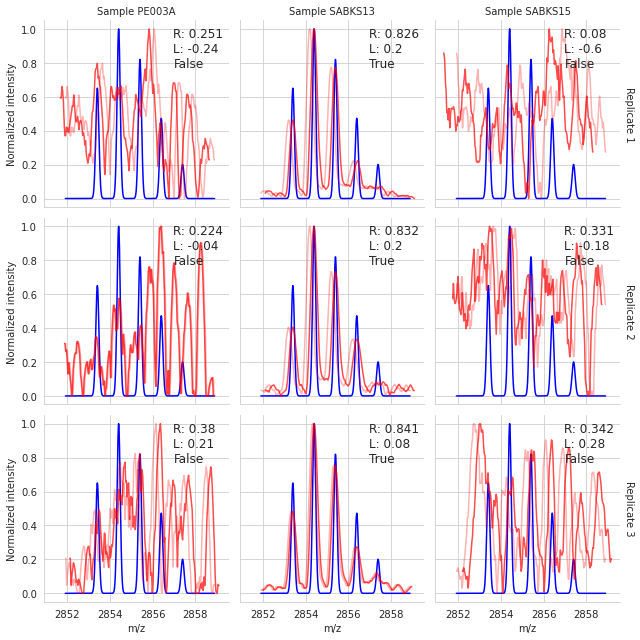

In [6]:
xy_carla_pept = xy_carla[xy_carla['pept'] == '246']
cor_carla_pept = cor_carla_test[cor_carla_test['pept'] == '246']
g = sns.FacetGrid(xy_carla_pept, col="sample_name", row="replicate", margin_titles=True)
g.map_dataframe(sns.lineplot, x='x', y='yri', color='blue')
g.map_dataframe(sns.lineplot, x='x', y='yii', color='red', alpha=0.3)
g.map_dataframe(sns.lineplot, x='x_lag', y='yii', color='red', alpha=0.7)
g.map_dataframe(annotate, cor_data = cor_carla_pept)
g.set_axis_labels("m/z", "Normalized intensity")
g.set_titles(col_template="Sample {col_name}", row_template="Replicate {row_name}" )
g.tight_layout()
plt.savefig(results_carla + 'col1a1586_calf.pdf')

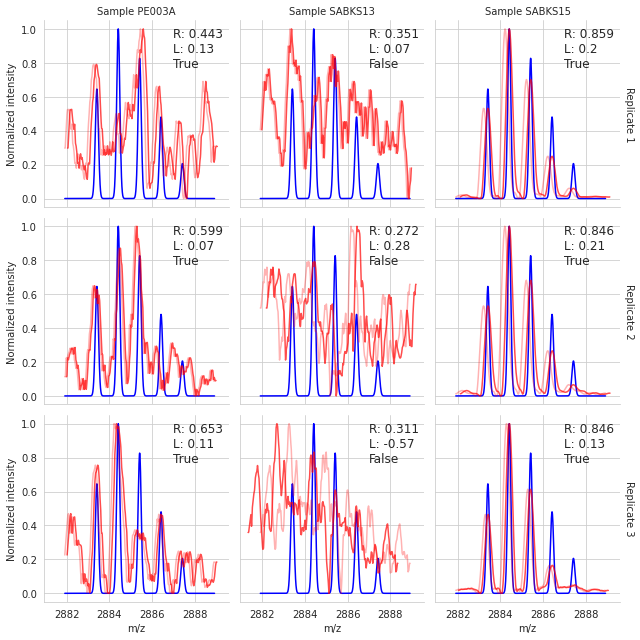

In [7]:
xy_carla_pept = xy_carla[xy_carla['pept'] == '249']
cor_carla_pept = cor_carla_test[cor_carla_test['pept'] == '249']
g = sns.FacetGrid(xy_carla_pept, col="sample_name", row="replicate", margin_titles=True)
g.map_dataframe(sns.lineplot, x='x', y='yri', color='blue')
g.map_dataframe(sns.lineplot, x='x', y='yii', color='red', alpha=0.3)
g.map_dataframe(sns.lineplot, x='x_lag', y='yii', color='red', alpha=0.7)
g.map_dataframe(annotate, cor_data = cor_carla_pept)
g.set_axis_labels("m/z", "Normalized intensity")
g.set_titles(col_template="Sample {col_name}", row_template="Replicate {row_name}" )
g.tight_layout()
plt.savefig(results_carla + 'col1a1586_sheep.pdf')


### Whole dataset

In [8]:
min_frac = 0.1
hws = 4
cor_carla_file = results_carla + f'long_cordata_{min_frac}_{hws}.rds'
cor_carla = pyreadr.read_r(cor_carla_file)[None]

In [9]:
cor_carla = cor_carla[cor_carla['sample_taxid'] != -1]
cor_carla = cor_carla[cor_carla['multiseq'] == False]
cor_carla = cor_carla[cor_carla['ndeam'] == 0]
mask = cor_carla[['9913','9925','9940']].apply(lambda df: df.sum(), axis=1) < 3
cor_carla = cor_carla[mask]

In [10]:
cor_carla['marker_in_sample'] = cor_carla.apply(check_anc, axis=1)

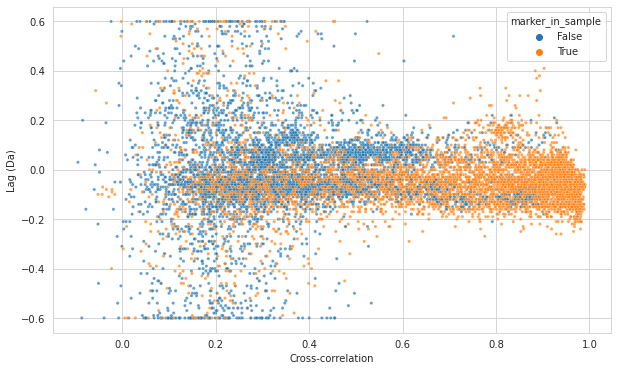

In [11]:
f, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x='cor', y='lag', hue='marker_in_sample',
                data=cor_carla, s=10, alpha=0.7, ax=axs)
axs.set_xlabel('Cross-correlation')
axs.set_ylabel('Lag (Da)')
plt.show()

Break it into the different peptides

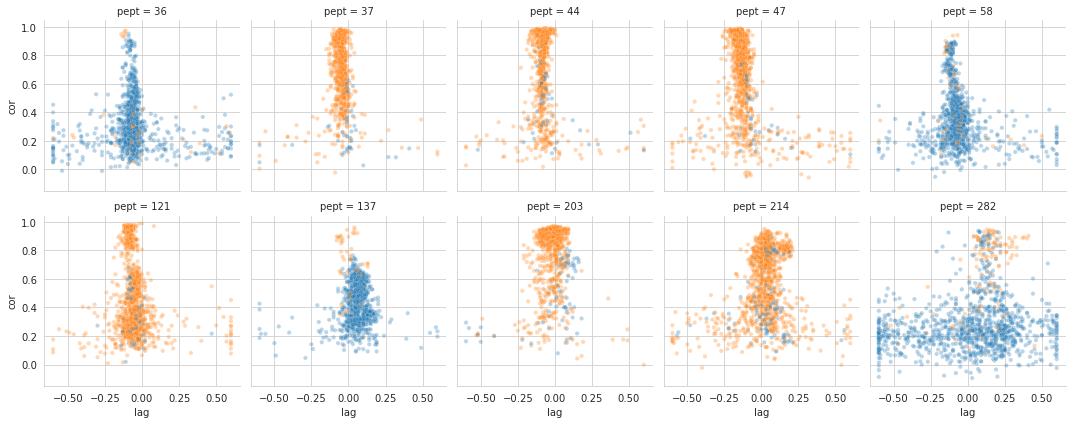

In [12]:
g = sns.FacetGrid(cor_carla, col="pept", margin_titles=True, col_wrap=5)
g.map_dataframe(sns.scatterplot, x='lag', y='cor', hue='marker_in_sample', size=6, alpha=0.3)
g.set_axis_labels("lag", "cor")
# g.set_titles(col_template="Sample {col_name}", row_template="Replicate {row_name}" )
g.tight_layout()

### ZooMS table markers

In [14]:
hws = 4
infile = results_carla + f'long_cordata_table_{hws}.rds'
cor_carla_table = pyreadr.read_r(infile)[None]


In [15]:
cor_carla_table = cor_carla_table[cor_carla_table['sample_taxid'] != -1]
cor_carla_table['marker_in_sample'] = cor_carla_table.apply(check_anc, axis=1)
cor_carla_table = cor_carla_table[cor_carla_table['multiseq'] == False]
cor_carla_table = cor_carla_table[cor_carla_table['ndeam'] == 0]
mask = cor_carla_table[['9913','9925','9940']].apply(lambda df: df.sum(), axis=1) < 3
cor_carla_table = cor_carla_table[mask]

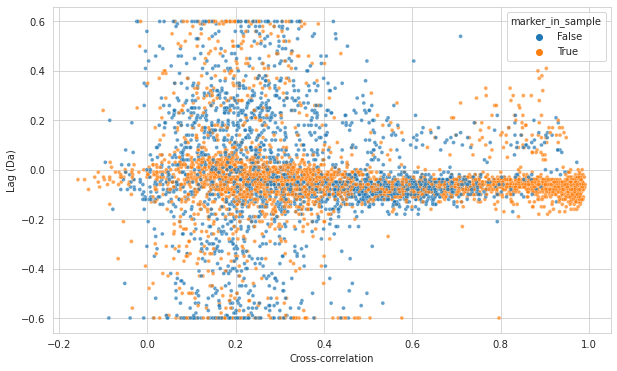

In [16]:
f, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x='cor', y='lag', hue='marker_in_sample',
                data=cor_carla_table, s=15, alpha=0.7, ax=axs)
axs.set_xlabel('Cross-correlation')
axs.set_ylabel('Lag (Da)')
plt.show()

Break it into the different peptides

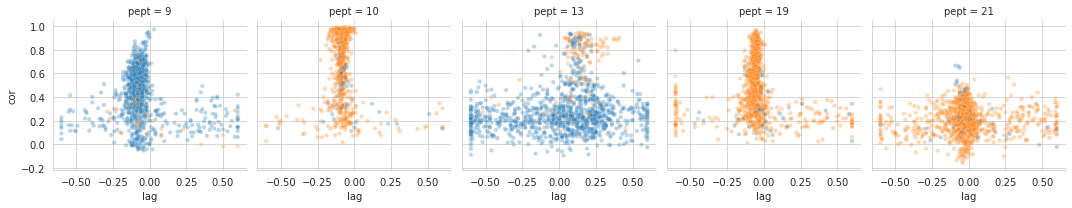

In [17]:
g = sns.FacetGrid(cor_carla_table, col="pept", margin_titles=True, col_wrap=5)
g.map_dataframe(sns.scatterplot, x='lag', y='cor', hue='marker_in_sample', size=6, alpha=0.3)
g.set_axis_labels("lag", "cor")
# g.set_titles(col_template="Sample {col_name}", row_template="Replicate {row_name}" )
g.tight_layout()

### Bacollite markers

In [18]:
hws = 4
infile = results_carla + f'long_cordata_bacollite_{hws}.rds'
cor_carla_bacollite = pyreadr.read_r(infile)

In [19]:
cor_carla_bacollite = cor_carla_bacollite[None]
cor_carla_bacollite = cor_carla_bacollite[cor_carla_bacollite['sample_taxid'] != -1]
cor_carla_bacollite['marker_in_sample'] = cor_carla_bacollite.apply(check_anc, axis=1)
cor_carla_bacollite = cor_carla_bacollite[cor_carla_bacollite['ndeam'] == 0]
mask = cor_carla_bacollite[['9913','9925','9940']].apply(lambda df: df.sum(), axis=1) < 3
cor_carla_bacollite = cor_carla_bacollite[mask]

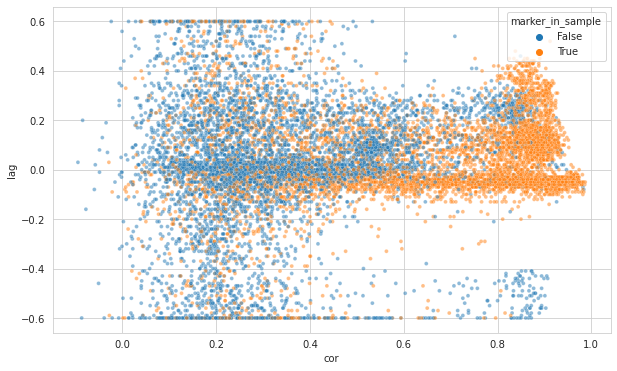

In [20]:
f, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x='cor', y='lag', hue='marker_in_sample',
                data=cor_carla_bacollite, s=15, alpha=0.5, ax=axs)
plt.show()

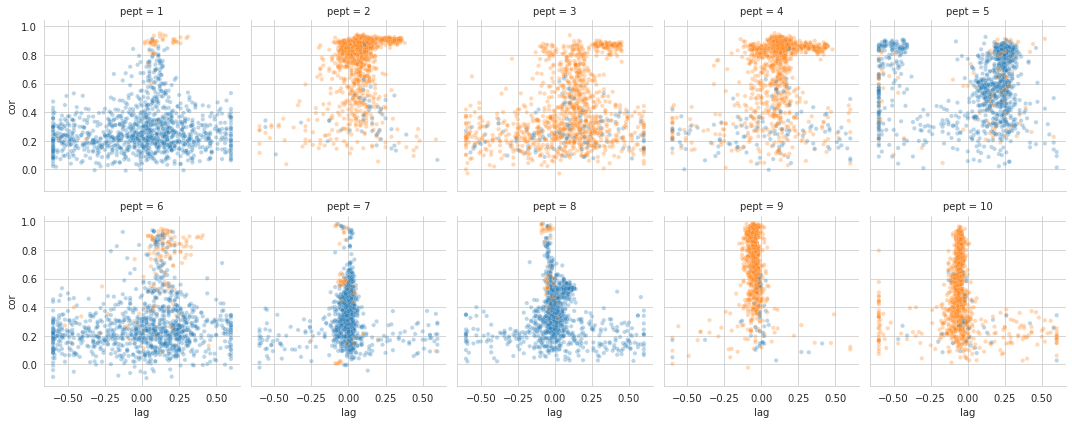

In [21]:
g = sns.FacetGrid(cor_carla_bacollite, col="pept", margin_titles=True, col_wrap=5)
g.map_dataframe(sns.scatterplot, x='lag', y='cor', hue='marker_in_sample', size=6, alpha=0.3)
g.set_axis_labels("lag", "cor")
# g.set_titles(col_template="Sample {col_name}", row_template="Replicate {row_name}" )
g.tight_layout()

### Combine all plots

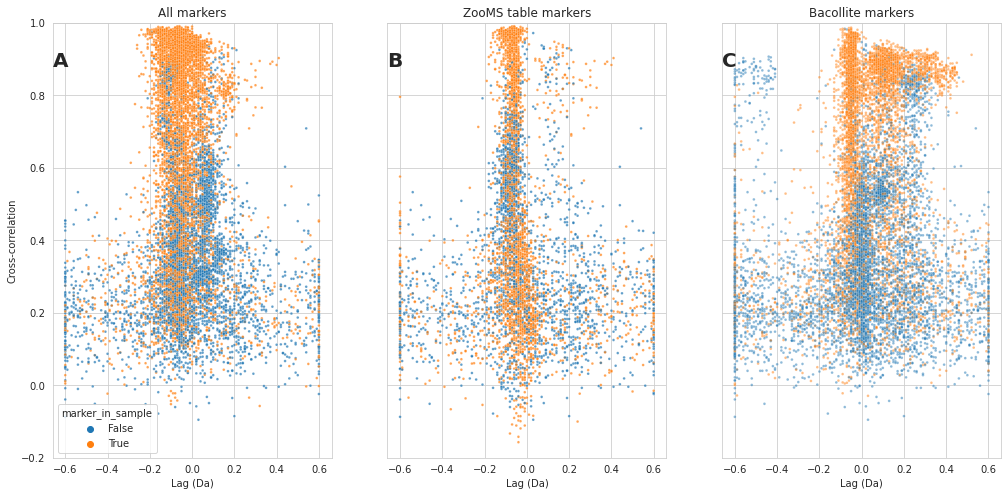

In [22]:
fig, axs = plt.subplots(ncols=3, figsize=(17, 8))

sns.scatterplot(x='lag', y='cor', hue='marker_in_sample',
                data=cor_carla, s=7, alpha=0.7, ax=axs[0])
sns.scatterplot(x='lag', y='cor', hue='marker_in_sample',
                data=cor_carla_table, s=7, alpha=0.7, ax=axs[1], legend=False)
sns.scatterplot(x='lag', y='cor', hue='marker_in_sample',
                data=cor_carla_bacollite, s=7, alpha=0.5, ax=axs[2], legend=False)
for i, ax in enumerate(axs):
    ax.set_ylim(-0.2, 1)
    ax.set_ylabel('Cross-correlation')
    ax.text(0, 0.9, string.ascii_uppercase[i],
        transform=ax.transAxes, size=20, weight='bold')
axs[0].set_xlabel('Lag (Da)')
axs[1].set_xlabel('Lag (Da)')
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[2].set_xlabel('Lag (Da)')
axs[2].set_yticklabels([])
axs[2].set_ylabel('')

axs[0].set_title('All markers')
axs[1].set_title('ZooMS table markers')
axs[2].set_title('Bacollite markers')

fig.savefig(results_carla + 'cross_correlation_lags.pdf')

plt.show()

Split train and test sets

In [23]:
cor_carla['spectra_name'] = cor_carla[['sample_name', 'replicate']].apply(lambda x: x.sample_name + '_' + str(x.replicate), axis=1)
cor_carla_test = cor_carla[['cor', 'lag', 'marker_in_sample', 'pept', 'spectra_name']]

In [24]:
cor_carla_test = cor_carla_test.pivot(index='spectra_name', columns='pept', values=['cor', 'lag', 'marker_in_sample'])
cor_carla_test

cor                                                          \
pept            121    137    203    214    282     36     37     44     47   
spectra_name                                                                  
A01_1         0.296  0.568  0.935  0.916  0.106  0.265  0.974  0.987   0.85   
A01_2         0.297  0.569  0.933  0.897  0.077  0.227  0.971  0.987  0.845   
A01_3         0.269  0.547  0.921   0.89  0.254  0.225   0.98  0.989  0.882   
A02_1         0.296   0.65  0.925  0.824  0.081  0.275  0.925  0.873  0.505   
A02_2         0.252  0.621  0.898  0.793  0.101    0.3  0.893  0.874   0.66   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
SABKS20_2     0.294  0.709   0.94  0.158  0.903  0.436  0.145  0.565  0.292   
SABKS20_3     0.414  0.707  0.955  0.156  0.895  0.186  0.157  0.652  0.151   
SABKS21_1     0.134  0.673  0.552  0.162  0.887  0.242  0.087  0.175  0.208   
SABKS21_2     0.324  0.686  0.828  0.167  0.893  0.171  0.147  0.176  0.216   
SABKS21_3     0.115  0.629  0.496  0.368  0.869  0.308  0.119  0.191  0.124   

                     ... marker_in_sample                                    \
pept             58  ...              121    137   203    214    282     36   
spectra_name         ...                                                      
A01_1         0.474  ...             True  False  True   True  False  False   
A01_2         0.379  ...             True  False  True   True  False  False   
A01_3         0.457  ...             True  False  True   True  False  False   
A02_1         0.472  ...             True  False  True   True  False  False   
A02_2         0.484  ...             True  False  True   True  False  False   
...             ...  ...              ...    ...   ...    ...    ...    ...   
SABKS20_2      0.24  ...            False   True  True  False   True   True   
SABKS20_3     0.209  ...            False   True  True  False   True   True   
SABKS21_1     0.235  ...            False   True  True  False   True   True   
SABKS21_2     0.272  ...            False   True  True  False   True   True   
SABKS21_3     0.112  ...            False   True  True  False   True   True   

                                          
pept             37     44     47     58  
spectra_name                              
A01_1          True   True   True  False  
A01_2          True   True   True  False  
A01_3          True   True   True  False  
A02_1          True   True   True  False  
A02_2          True   True   True  False  
...             ...    ...    ...    ...  
SABKS20_2     False  False  False   True  
SABKS20_3     False  False  False   True  
SABKS21_1     False  False  False   True  
SABKS21_2     False  False  False   True  
SABKS21_3     False  False  False   True  

[1203 rows x 30 columns]

In [25]:
cor_carla_test.loc[:,[('cor','121'), ('lag','121')]]

cor   lag
pept            121   121
spectra_name             
A01_1         0.296 -0.06
A01_2         0.297 -0.05
A01_3         0.269 -0.07
A02_1         0.296 -0.06
A02_2         0.252 -0.06
...             ...   ...
SABKS20_2     0.294 -0.02
SABKS20_3     0.414   0.0
SABKS21_1     0.134 -0.14
SABKS21_2     0.324 -0.04
SABKS21_3     0.115  0.01

[1203 rows x 2 columns]

## Orval dataset

In [3]:
# Test data
test_results_orval = '~/palaeoproteomics/MALDI/orval/test_pycol_results/'
xy_orval_file = test_results_orval + 'long_xydata.rds'
cor_orval_file = test_results_orval + 'long_cordata.rds'
results_orval = '/home/ismael/palaeoproteomics/MALDI/orval/pycol_results/'

In [27]:
xy_orval = pyreadr.read_r(xy_orval_file)[None]
cor_orval_test = pyreadr.read_r(cor_orval_file)[None]

In [28]:
cor_orval_test['marker_in_sample'] = cor_orval_test.apply(check_anc, axis=1)
cor_orval_test.sort_values('seqpos')

cor   lag pept sample_name replicate  \
316   0.029 -0.14  317      114-10         1   
1376  0.386 -0.16  312       118-4         1   
1375  0.123  0.38  311       118-4         1   
1373  0.338  0.37  309       118-4         1   
1370  0.341  0.39  306       118-4         1   
...     ...   ...  ...         ...       ...   
855   0.794  0.10  146      114-10         3   
1210  0.939  0.08  146       118-4         1   
145   0.781  0.09  146      114-10         1   
2275  0.755  0.07  146       26-10         1   
1920  0.937  0.06  146       118-4         3   

                                    seq  seqpos      mass1  missed.cleaves  \
316   GPPGASGAPGPQGFQGPPGEPGEPGQTGPAGAR    10.0  3036.3094               0   
1376  GPPGASGAPGPQGFQGPPGEPGEPGQTGPAGAR    10.0  3033.3574               0   
1375  GPPGASGAPGPQGFQGPPGEPGEPGQTGPAGAR    10.0  3020.3145               0   
1373  GPPGASGAPGPQGFQGPPGEPGEPGQTGPAGAR    10.0  3019.3305               0   
1370  GPPGASGAPGPQGFQGPPGEPGEPGQTGPAGAR    10.0  3018.3465               0   
...                                 ...     ...        ...             ...   
855              TGDAGPAVSPPTLSAHGPPALK   989.0  2057.0667               0   
1210             TGDAGPAVSPPTLSAHGPPALK   989.0  2057.0667               0   
145              TGDAGPAVSPPTLSAHGPPALK   989.0  2057.0667               0   
2275             TGDAGPAVSPPTLSAHGPPALK   989.0  2057.0667               0   
1920             TGDAGPAVSPPTLSAHGPPALK   989.0  2057.0667               0   

      ndeam  ...  score   slope_b     rsq_b slope_logb  rsq_logb         A  \
316     3.0  ...  22.15 -0.000387  0.763306  -0.000273  0.809237  0.103386   
1376    0.0  ...   27.6 -0.000617  0.828749  -0.000304  0.876498  0.480992   
1375    3.0  ...   27.6 -0.000617  0.828749  -0.000304  0.876498  0.480992   
1373    2.0  ...   27.6 -0.000617  0.828749  -0.000304  0.876498  0.480992   
1370    1.0  ...   27.6 -0.000617  0.828749  -0.000304  0.876498  0.480992   
...     ...  ...    ...       ...       ...        ...       ...       ...   
855     0.0  ...  22.15 -0.000387  0.763306  -0.000273  0.809237  0.103386   
1210    0.0  ...   27.6 -0.000617  0.828749  -0.000304  0.876498  0.480992   
145     0.0  ...  22.15 -0.000387  0.763306  -0.000273  0.809237  0.103386   
2275    0.0  ...   39.8 -0.000919  0.644534  -0.000269  0.614289  0.084516   
1920    0.0  ...   27.6 -0.000617  0.828749  -0.000304  0.876498  0.480992   

      frac_rem       date_plateid  sample_taxid  marker_in_sample  
316   0.104845  2018-06-22 - SS03        9940.0              True  
1376  0.027789  2019-07-06 - SS25        9913.0              True  
1375  0.027789  2019-07-06 - SS25        9913.0              True  
1373  0.027789  2019-07-06 - SS25        9913.0              True  
1370  0.027789  2019-07-06 - SS25        9913.0              True  
...        ...                ...           ...               ...  
855   0.104845  2018-06-22 - SS03        9940.0              True  
1210  0.027789  2019-07-06 - SS25        9913.0             False  
145   0.104845  2018-06-22 - SS03        9940.0              True  
2275  0.128948  2019-03-25 - SS21        9925.0             False  
1920  0.027789  2019-07-06 - SS25        9913.0             False  

[3195 rows x 52 columns]

Plot alignments

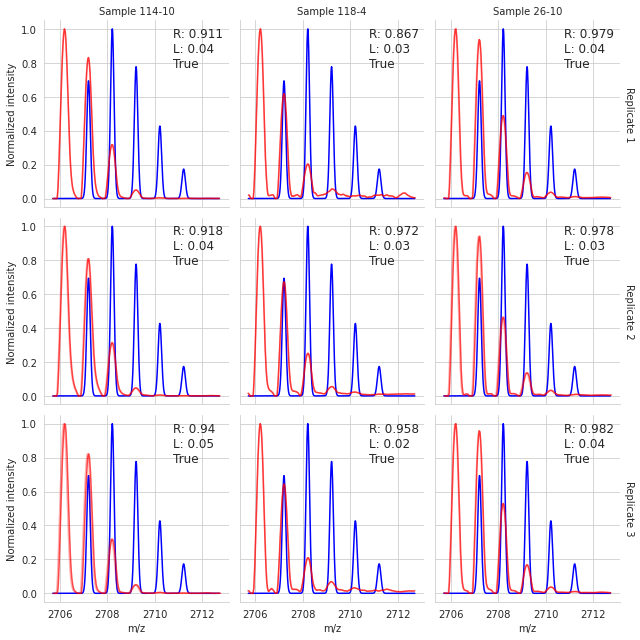

In [29]:
xy_orval_pept = xy_orval[xy_orval['pept'] == '246']
cor_orval_pept = cor_orval_test[cor_orval_test['pept'] == '246']
g = sns.FacetGrid(xy_orval_pept, col="sample_name", row="replicate", margin_titles=True)
g.map_dataframe(sns.lineplot, x='x', y='yri', color='blue')
g.map_dataframe(sns.lineplot, x='x', y='yii', color='red', alpha=0.3)
g.map_dataframe(sns.lineplot, x='x_lag', y='yii', color='red', alpha=0.7)
g.map_dataframe(annotate, cor_data=cor_orval_test)
g.set_axis_labels("m/z", "Normalized intensity")
g.set_titles(col_template="Sample {col_name}", row_template="Replicate {row_name}")
g.tight_layout()
plt.savefig(results_orval + 'col1a1586_calf.pdf')

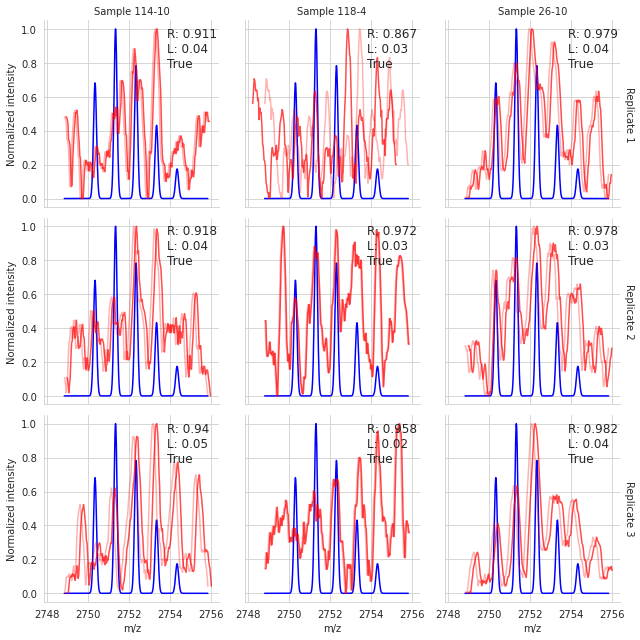

In [30]:
xy_orval_pept = xy_orval[xy_orval['pept'] == '249']
cor_data_test = cor_orval_test[cor_orval_test['pept'] == '249']
g = sns.FacetGrid(xy_orval_pept, col="sample_name", row="replicate", margin_titles=True)
g.map_dataframe(sns.lineplot, x='x', y='yri', color='blue')
g.map_dataframe(sns.lineplot, x='x', y='yii', color='red', alpha=0.3)
g.map_dataframe(sns.lineplot, x='x_lag', y='yii', color='red', alpha=0.7)
g.map_dataframe(annotate, cor_data=cor_orval_test)
g.set_axis_labels("m/z", "Normalized intensity")
g.set_titles(col_template="Sample {col_name}", row_template="Replicate {row_name}")
g.tight_layout()
plt.savefig(results_orval + 'col1a1586_sheep.pdf')

### Whole dataset

In [4]:
min_frac = 0.1
hws = 4
cor_orval_file = results_orval + f'long_cordata_{min_frac}_{hws}.rds'
cor_orval = pyreadr.read_r(cor_orval_file)[None]

In [7]:
cor_orval = cor_orval[cor_orval['sample_taxid'] != -1]
cor_orval = cor_orval[cor_orval['sample_taxid'] != 9963]
cor_orval = cor_orval[pd.notna(cor_orval['sample_taxid'])]
cor_orval = cor_orval[cor_orval['multiseq'] == False]
cor_orval = cor_orval[cor_orval['ndeam'] == 0]
mask = cor_orval[['9913', '9925', '9940']].apply(lambda df: df.sum(), axis=1) < 3
cor_orval = cor_orval[mask]
cor_orval['marker_in_sample'] = cor_orval.apply(check_anc, axis=1)

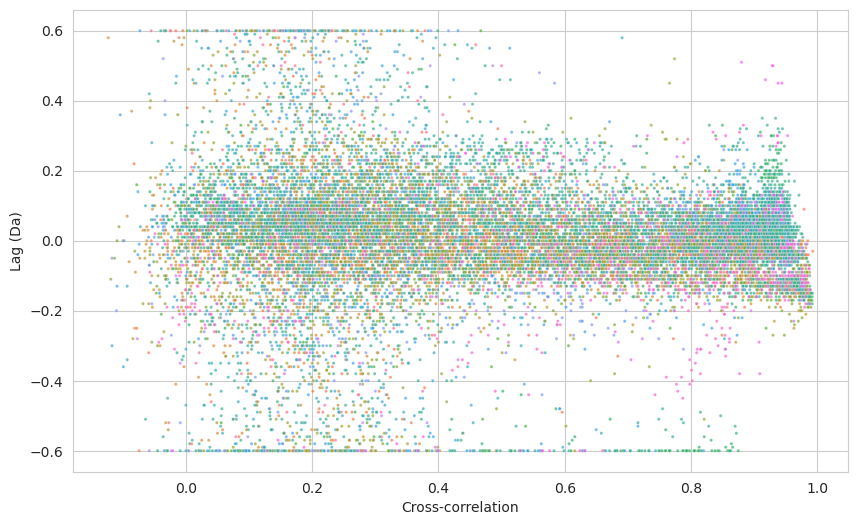

In [9]:
cor_orval_sheep = cor_orval[cor_orval['sample_taxid'] == 9940]

f, axs = plt.subplots(1, 1, figsize=(10, 6))
g = sns.scatterplot(x='cor', y='lag', hue='plate_id',
                data=cor_orval_sheep, s=5, alpha=0.7, ax=axs)
g.legend_.remove()
axs.set_xlabel('Cross-correlation')
axs.set_ylabel('Lag (Da)')
plt.show()


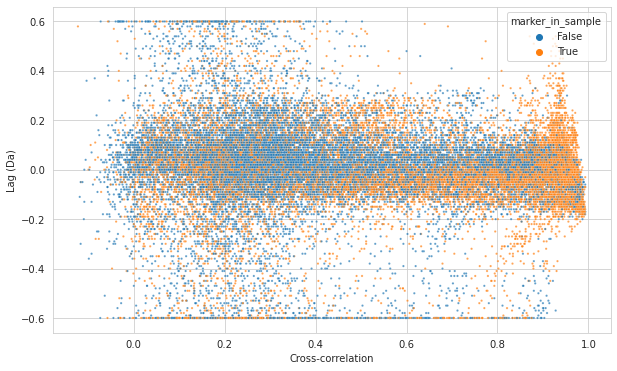

In [33]:
f, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x='cor', y='lag', hue='marker_in_sample',
                data=cor_orval, s=5, alpha=0.7, ax=axs)
axs.set_xlabel('Cross-correlation')
axs.set_ylabel('Lag (Da)')
plt.show()


Break it into the different peptides

In [34]:
len(cor_orval.groupby('pept'))

12

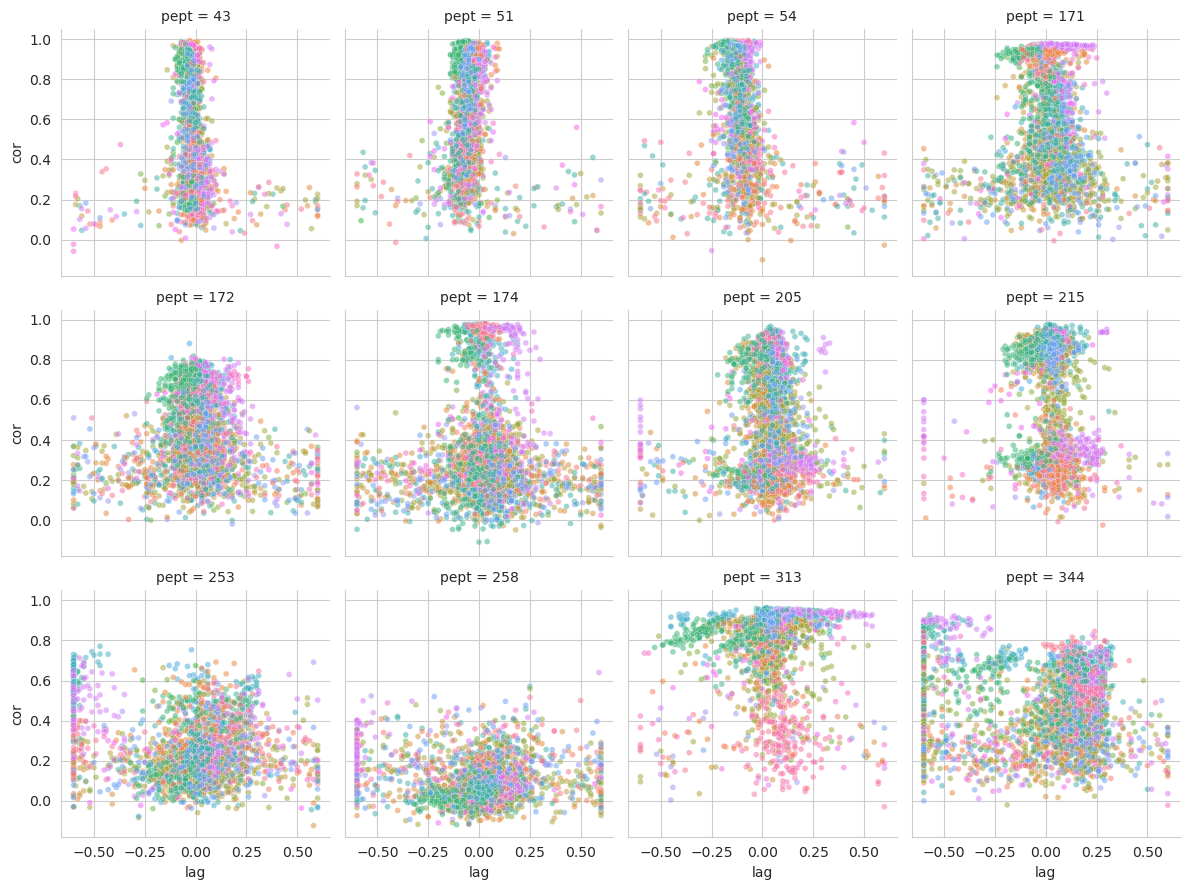

In [14]:
g = sns.FacetGrid(cor_orval, col="pept", margin_titles=True, col_wrap=4)
g.map_dataframe(sns.scatterplot, x='lag', y='cor', hue='plate_id', size=6, alpha=0.5)
g.set_axis_labels("lag", "cor")
# g.set_titles(col_template="Sample {col_name}", row_template="Replicate {row_name}" )
g.tight_layout()

### ZooMS table markers

In [36]:
hws = 4
infile = results_orval + f'long_cordata_table_{hws}.rds'
cor_orval_table = pyreadr.read_r(infile)[None]

In [37]:
cor_orval_table = cor_orval_table[cor_orval_table['sample_taxid'] != -1]
cor_orval_table = cor_orval_table[cor_orval_table['sample_taxid'] != 9963]
cor_orval_table = cor_orval_table[pd.notna(cor_orval_table['sample_taxid'])]
cor_orval_table = cor_orval_table[cor_orval_table['multiseq'] == False]
cor_orval_table = cor_orval_table[cor_orval_table['ndeam'] == 0]
mask = cor_orval_table[['9913', '9925', '9940']].apply(lambda df: df.sum(), axis=1) < 3
cor_orval_table = cor_orval_table[mask]
cor_orval_table['marker_in_sample'] = cor_orval_table.apply(check_anc, axis=1)

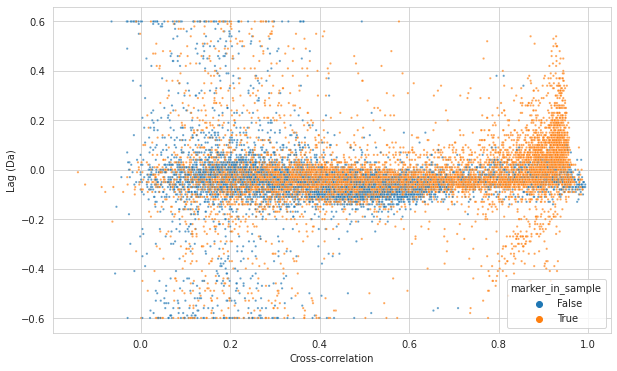

In [38]:
f, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x='cor', y='lag', hue='marker_in_sample',
                data=cor_orval_table, s=5, alpha=0.7, ax=axs)
axs.set_xlabel('Cross-correlation')
axs.set_ylabel('Lag (Da)')
plt.show()

Break it into the different peptides

In [39]:
len(cor_orval_table.groupby('pept'))

5

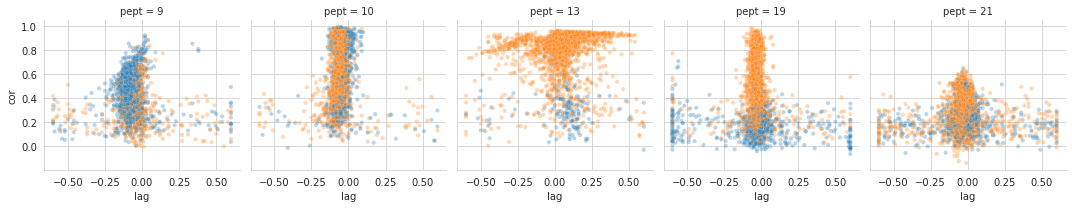

In [40]:
g = sns.FacetGrid(cor_orval_table, col="pept", margin_titles=True, col_wrap=5)
g.map_dataframe(sns.scatterplot, x='lag', y='cor', hue='marker_in_sample', size=6, alpha=0.3)
g.set_axis_labels("lag", "cor")
# g.set_titles(col_template="Sample {col_name}", row_template="Replicate {row_name}" )
g.tight_layout()

### Bacollite markers

In [41]:
hws = 4
infile = results_orval + f'long_cordata_bacollite_{hws}.rds'
cor_orval_bacollite = pyreadr.read_r(infile)[None]

In [42]:
cor_orval_bacollite = cor_orval_bacollite[cor_orval_bacollite['sample_taxid'] != -1]
cor_orval_bacollite = cor_orval_bacollite[cor_orval_bacollite['sample_taxid'] != 9963]
cor_data_bacollite = cor_orval_bacollite[pd.notna(cor_orval_bacollite['sample_taxid'])]
cor_data_bacollite = cor_data_bacollite[cor_data_bacollite['ndeam'] == 0]
mask = cor_data_bacollite[['9913', '9925', '9940']].apply(lambda df: df.sum(), axis=1) < 3
cor_data_bacollite = cor_data_bacollite[mask]
cor_data_bacollite['marker_in_sample'] = cor_data_bacollite.apply(check_anc, axis=1)

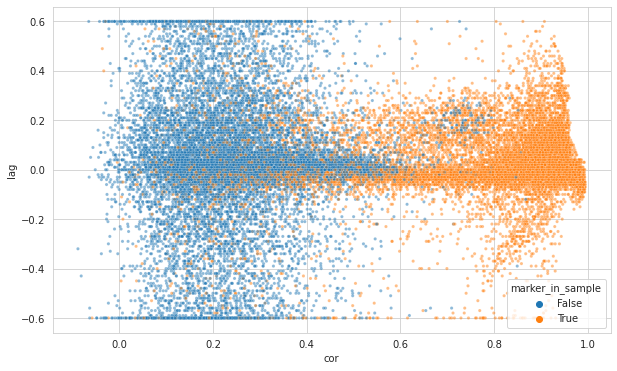

In [43]:
f, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x='cor', y='lag', hue='marker_in_sample',
                data=cor_data_bacollite, s=10, alpha=0.5, ax=axs)
plt.show()

Break it into the different peptides

In [44]:
len(cor_data_bacollite.groupby('pept'))

10

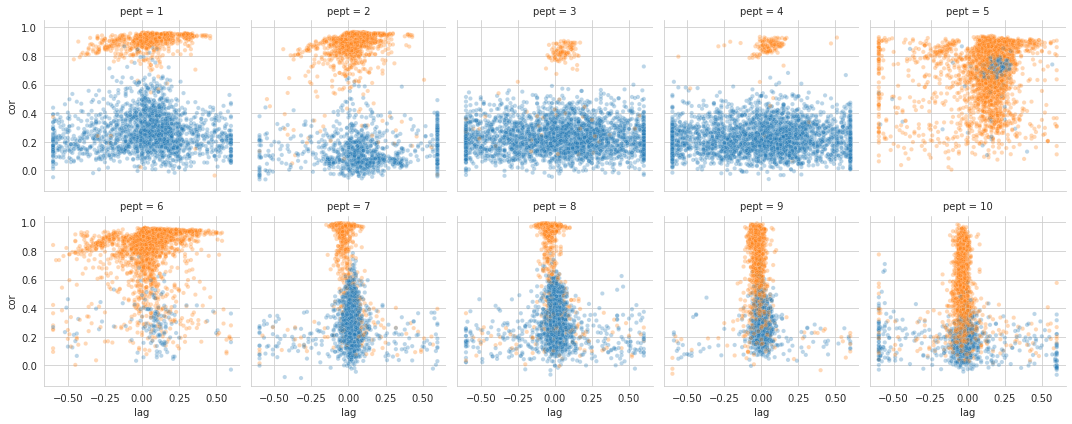

In [45]:
g = sns.FacetGrid(cor_data_bacollite, col="pept", margin_titles=True, col_wrap=5)
g.map_dataframe(sns.scatterplot, x='lag', y='cor', hue='marker_in_sample', size=6, alpha=0.3)
g.set_axis_labels("lag", "cor")
# g.set_titles(col_template="Sample {col_name}", row_template="Replicate {row_name}" )
g.tight_layout()

### Combina all plots

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(17, 8))

sns.scatterplot(x='lag', y='cor', hue='marker_in_sample',
                data=cor_orval, s=7, alpha=0.7, ax=axs[0])
sns.scatterplot(x='lag', y='cor', hue='marker_in_sample',
                data=cor_orval_table, s=7, alpha=0.7, ax=axs[1], legend=False)
sns.scatterplot(x='lag', y='cor', hue='marker_in_sample',
                data=cor_orval_bacollite, s=7, alpha=0.5, ax=axs[2], legend=False)
for i, ax in enumerate(axs):
    ax.set_ylim(-0.2, 1)
    ax.set_ylabel('Cross-correlation')
    ax.text(0.05, 0.95, string.ascii_uppercase[i],
        transform=ax.transAxes, size=20, weight='bold')
axs[0].set_xlabel('Lag (Da)')
axs[1].set_xlabel('Lag (Da)')
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[2].set_xlabel('Lag (Da)')
axs[2].set_yticklabels([])
axs[2].set_ylabel('')

axs[0].set_title('All markers')
axs[1].set_title('ZooMS table markers')
axs[2].set_title('Bacollite markers')

fig.savefig(results_orval + 'cross_correlation_lags.pdf')

plt.show()